In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

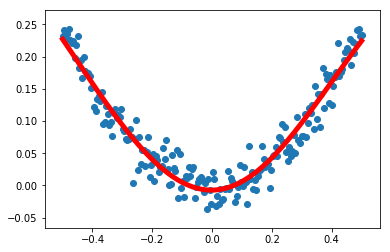

In [26]:
#使用numy 生成随机点
#-0.5至0.5之间生成200个点，200个点均匀分布[增加维度]

x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
#随机生成
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placeholder 第二个参数，形状行不确定，列是一列

#若传过来的是200 None就是200 传 过来是500 None就是 500
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#输入一个X 经过神经网络的计算 出现一个 y
#输入层是一个神经元，输出层一个神经元

#定义神经网络的中间层[1,10] 代表一个输入神经元
Weights_L1 = tf.Variable(tf.random_normal([1,10])) #可改变的变量
biases_L1 = tf.Variable(tf.zeros([1,10])) #可改变的变量
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+biases_L1
#输出层的值
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层

Weight_L2 = tf.Variable(tf.random_normal([10,1]))#可改变的变量
biases_L2 = tf.Variable(tf.zeros([1,1]))#可改变的变量
#输出层信号的总和
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2)+biases_L2
#需要预测的值
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数  目的就是使整个模型的loss值不断减少
loss = tf.reduce_mean(tf.square(y-prediction))

#使用梯度下降法 使用梯度下降法最小化loss值
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        #样本的X和样本的Y
        sess.run(train_step,feed_dict={x:x_data, y:y_data})
    #获得预测值
    
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data, prediction_value, 'r-',lw=5)
    plt.show()
    
    
    